## import necessary libraries

In [1]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt

## data_loading

In [2]:
housing = pd.read_csv('/home/mhmd/Desktop/California-housing-prices/housing.csv')

## data_exploration

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Note:** In this dataset, there are categorical variables (non-numerical data) present. We will address these variables later in the data preprocessing step.


In [4]:
housing.info() 
# as you can see in output we have NULL cells we will fix it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### X Values

#### housing_median_age:
- The median age for houses in the dataset is 28 years. 
- Additionally, less than 25% of houses have an age of 18 years, which represents the first quartile.
- The dataset also includes values for the second quartile (50%), third quartile (75%), as well as minimum and maximum ages.

#### total_rooms:
- This feature represents the total number of rooms in each house.
- Summary statistics include minimum and maximum values, as well as the first, second, and third quartiles.

#### total_bedrooms:
- Similar to the total_rooms feature, this indicates the total number of bedrooms in each house.
- Summary statistics follow the same pattern as total_rooms.

#### population_households:
- These features are combined for analysis purposes, although they may be separated in future iterations.
- Further details will be discussed regarding their usage in the future.

#### median_income:
- Represents the median income of households in a year.
- Despite its significance, preprocessing is required to address potential issues.

#### ocean_proximity:
- This feature is categorical, necessitating conversion to numerical format for machine learning purposes.
- As evident from the describe() method, ocean_proximity data is not included in the summary statistics.

### y Value

#### median_house_value:
- This feature serves as the target variable for our machine learning model.
- Our objective is to develop a model capable of predicting house prices in California based on the provided X features.


## data_visualizing & play around

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

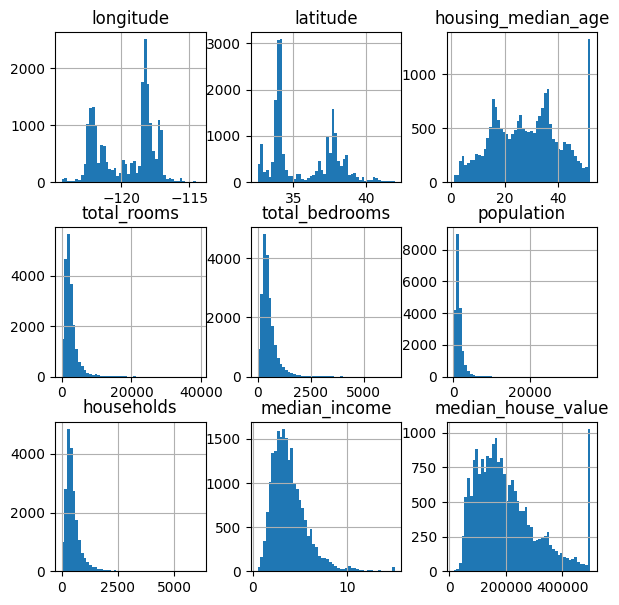

In [6]:
housing.hist(figsize=(7,7),bins=50) #in here we can see that everythhing  is good except 4 features that tend to be on  the left of our histogram.


<Axes: xlabel='longitude', ylabel='latitude'>

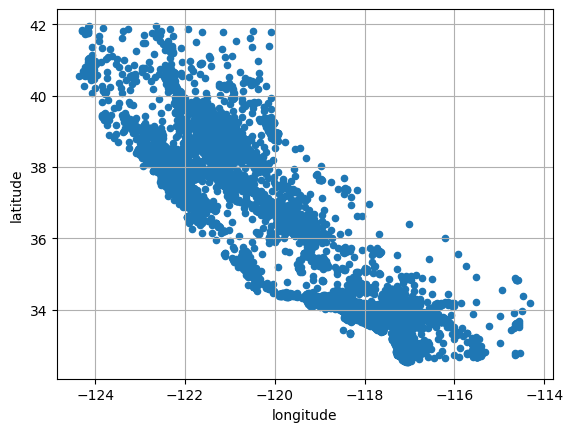

In [7]:
housing.plot(kind='scatter',x='longitude',y='latitude', grid=True) 
# this is a good visualizing but we cant see where do we have more data that are gathered togethere so we will use alpha to make it more useable

<Axes: xlabel='longitude', ylabel='latitude'>

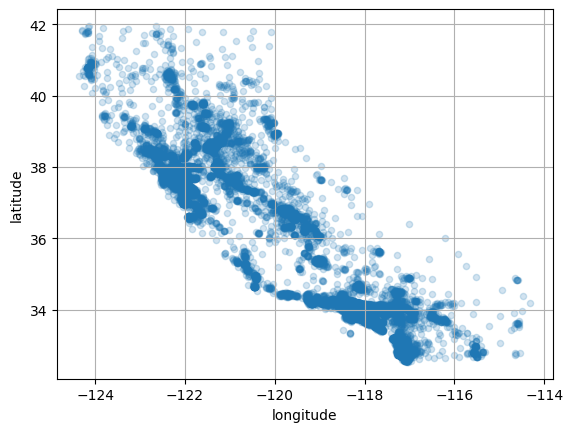

In [8]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,grid=True)
# from here we  can see that  where houses are near and guess the important places

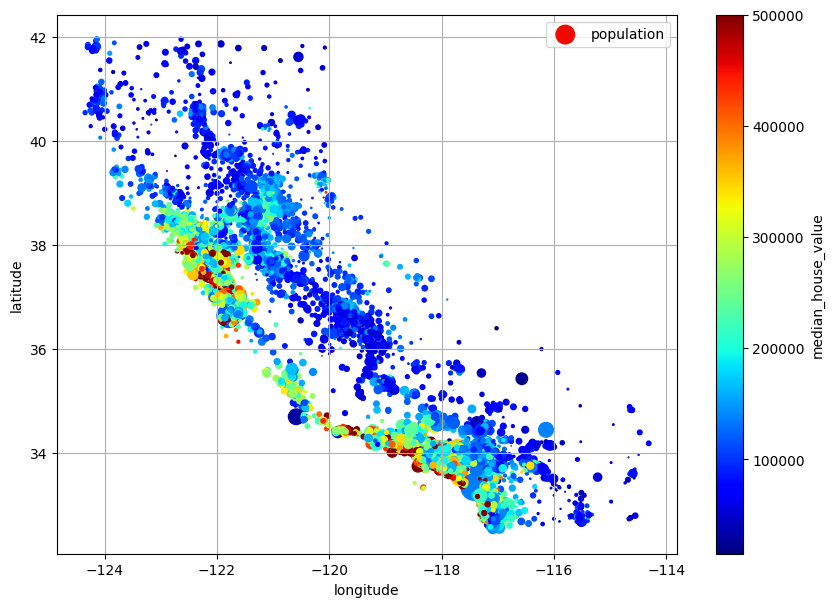

In [9]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,
             s=housing['population']/100,label='population',
             c='median_house_value',cmap='jet',colorbar=True,
             legend=True,sharex=False,figsize=(10,7))
plt.show()

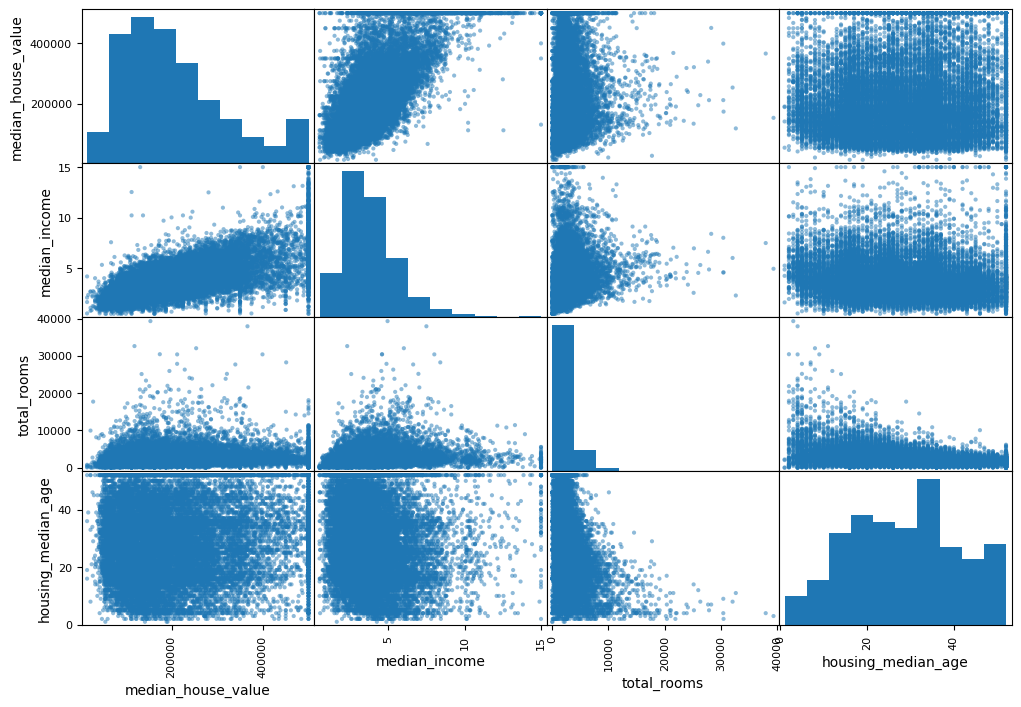

In [10]:
from pandas.plotting import scatter_matrix
atts  = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[atts],figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

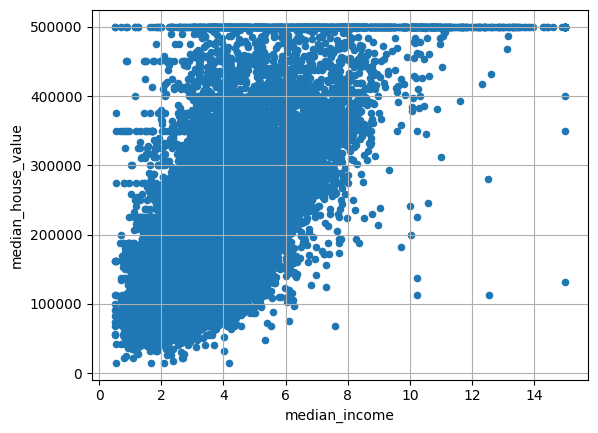

In [11]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',grid=True)

## train_test_split 
there are three ways to split data you can use data shuffeling or crc32 library or for simplicity you can use the sklearn train_test_split method to split you'r data.

### shuffle_split


In [12]:
def shuffle_split(data,test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_set_shuff,test_set_shuff = shuffle_split(housing,0.2)

### id_hash_split

In [13]:
from zlib import crc32
def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier)) < test_ratio *2**32
def splt_data_hash(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_Set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_Set],data.loc[in_test_Set]
housing_with_id = housing.reset_index()
train_set_id,test_set_id = splt_data_hash(housing_with_id,0.2,'index')

### using_sklearn_lib

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

#### methods_comparison

In [15]:
np.random.seed(42)
# if you want to get same number every time

In [16]:
dt_test_set_shuff = pd.DataFrame(test_set_shuff)
dt_test_set_shuff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20419,-118.05,33.73,25.0,2472.0,450.0,1301.0,467.0,5.0699,266100.0,<1H OCEAN
2891,-119.55,36.61,14.0,3004.0,793.0,3535.0,735.0,1.5860,56900.0,INLAND
6050,-122.02,38.26,27.0,3440.0,787.0,2085.0,748.0,2.5896,104700.0,INLAND
10465,-122.23,40.15,14.0,2297.0,573.0,1637.0,551.0,1.7870,51600.0,INLAND
20519,-121.82,37.27,16.0,2030.0,321.0,1343.0,365.0,6.3566,279100.0,<1H OCEAN


In [17]:
dt_test_id = pd.DataFrame(test_set_id)
dt_test_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [18]:
dt_test_sklearn = pd.DataFrame(test_set)
dt_test_sklearn.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


# female ratio

In [19]:
#code 
from scipy.stats import binom 
sample_size = 1000
femail_rat = 0.511
prob_too_small = binom(sample_size,femail_rat).cdf(485-1)
prob_too_big = 1 - binom(sample_size,femail_rat).cdf(535)
print(prob_too_small+prob_too_big)


0.10736798530929942


In [20]:
# math 
np.random.seed(42)
samples = (np.random.rand(100_000,sample_size)<femail_rat).sum(axis=1)
((samples<485)| (samples>535)).mean()

0.1071

### income cat
in our dataset there is a column that shows median income of each row but we have problem in defining data because the data is in USDC $ and we need to omit zeros for that we need to do the following...

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

#### startification

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits = []
for train_index,test_index in splitter.split(housing,housing['income_cat']):
    strat_train_set_n  = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])
strat_train_set_n,strat_test_set_n = strat_splits[0]


In [23]:
strat_test,strat_train = train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)
for set_  in(strat_train,strat_test):
    set_.drop('income_cat',axis=1,inplace=True)

In [24]:
housing=strat_train.copy()

***NOTE***: the reason that we dropped the income_cat after making it was the we don't need it right now and it was just for playing around, BTW this will be useful in cross validation in the future.

### categorical_att
as we saw in our dataset we have none numerical att in our .csv file so we need to manage them and convert to numerical atts there are two emthods that we are going to cover.

#### Ordinal_Encoder
In ordinal encoder method it splits the column values in to N groups and give them number then inputs that specific number insteadd of words

In [25]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[['ocean_proximity']]
ord_enc = OrdinalEncoder()
housing_cat_o = ord_enc.fit_transform(housing_cat)
housing_cat_o

array([[0.],
       [0.],
       [4.],
       ...,
       [0.],
       [3.],
       [4.]])

#### One_Hot_Encoder
this method makes N columns for N type of values in our dataset and set a column to 1 and the others will be 0.

In [26]:
from sklearn.preprocessing  import OneHotEncoder
one_H_o = OneHotEncoder()
housing_cat_H = one_H_o.fit_transform(housing_cat)

***Note***: now that we dont have any none numerical att and all  of the dataset is preprocessed we can correlate the data to  see which datas can be combined to fit best.

### correlation 
it's time to dive into the correlation, it is a mathematical method used to find effects of every x feature on our y feature.

In [27]:
corr_matrix = housing.corr(numeric_only=True)
# made the corr now we can see each ones correlation

In [28]:
corr_matrix['median_income'].sort_values(ascending=True)

housing_median_age   -0.087699
latitude             -0.086326
total_bedrooms       -0.014553
longitude            -0.009866
population            0.006730
households            0.010658
total_rooms           0.199430
median_house_value    0.687091
median_income         1.000000
Name: median_income, dtype: float64

In [29]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population']/ housing['households']

In [30]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)
# down below you can see atts that have more effect on median house value 

median_house_value    1.000000
median_income         0.687091
rooms_per_house       0.198322
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
people_per_house     -0.025974
longitude            -0.026768
population           -0.040286
latitude             -0.162087
bedrooms_ratio       -0.254506
Name: median_house_value, dtype: float64

### prepare data for machine learning algorithms

In [31]:
housing = strat_train.drop('median_house_value',axis=1)
housing_labels = strat_train['median_house_value'].copy()

### data cleaning
as we saw we have some null cells in our data set there are three options we can use to make our dataset better.

met1 = drop all null cells with their row

met2 = drop the feature and ommit using it 

met3 = get the median of the features value and insert them into the null cells

In [ ]:
housing.dropna(subset=['total_bedrooms'],inplace=True)   #met1

housing.drop('total_bedrooms',inplace=True)    #met2

median = housing['total_bedrooms'].median
housing['total_bedrooms'].fillna(median,inplace=True)   #met3

### imputer 

imputer is a strategy that lets you to input null cells from sklearn impute

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.46  ,   34.24  ,   29.    , 2131.    ,  438.    , 1161.    ,
        412.    ,    3.5227])

In [36]:
housing_num.median().values

array([-118.46  ,   34.24  ,   29.    , 2131.    ,  438.    , 1161.    ,
        412.    ,    3.5227])

***NOTE***: as we only had missing value in total_bedrooms and fix them we wont have any problem with this feature for now but when the system goes live for its safty its better  to use imputer on numerical attributes

### feature scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scale = min_max_scaler.fit_transform(housing_num)

In [38]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_std_scaler = std_scaler.fit_transform(housing_num)

### all in one 
now that we know about feture engineering we can combine codes to make changes listed below 

Missing values in numerical features will be imputed by replacing with the median of the feature and in categorical columns we'll use most frequent strategy 

the categorical att will be one hot encoded as most ML algorithms only accept numerical inputs

we added a few ratio features that correlates better in ML model 

we used a few cluster similarity features.

features needed to be scaled better by standard scaler on min max scaler because of their long tail 

all numerical need to be standardized as most ML algorithms like same scale


In [54]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel


In [55]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [56]:
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [57]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [62]:
#  now we can see prepared housing dataset
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(4089, 24)

In [60]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)